In [1]:
# process 7 PAH EPR

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil, time

import warnings
warnings.filterwarnings('ignore')

import sys
util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/util"
sys.path.insert(0, util_path)

In [2]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/3_bmd_feasibility_BMD/each/7_PAH/EPR


In [3]:
#EPR devel data file
#complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/7_PAH/01_11_2021/input/wide/7_PAH_zf_EPR_data_2021JAN11_wide_t1_t50_devel.csv'

#EPR full data file
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/7_PAH/01_11_2021/input/wide/7_PAH_zf_EPR_data_2021JAN11_wide_t1_t50_full.csv'

epr_all_data= pd.read_csv(complete_file_path, header = 0)
display(epr_all_data.head())

unique_chemical_id_in_epr_all_data = np.unique(epr_all_data['chemical.id'])
print (len(unique_chemical_id_in_epr_all_data))

,chemical.id,plate.id,well,chemical_plate_well,conc,t1,t2,t3,t4,t5,...,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50
0,3756,20544,A01,3756_20544_A01,100.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,3756,20544,A02,3756_20544_A02,100.0,0.0,0.0,31.445283,0.000000,33.593737,...,12.890625,0.000000,19.422747,5.295147,0.0,0.0,0.0,0.0,0.0,9.765619
2,3756,20544,A03,3756_20544_A03,100.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,3756,20544,A04,3756_20544_A04,100.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,3756,20544,A05,3756_20544_A05,100.0,0.0,0.0,0.000000,90.364532,23.893231,...,0.000000,28.103313,5.013020,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


7


In [4]:
#display("epr_all_data.shape:" + str(epr_all_data.shape))
# Convert plate ids to ints
epr_all_data['plate.id'] = (epr_all_data['plate.id'].values).astype(int)
display(epr_all_data.tail())

,chemical.id,plate.id,well,chemical_plate_well,conc,t1,t2,t3,t4,t5,...,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50
2011,3859,20491,H08,3859_20491_H08,100.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,3859,20491,H09,3859_20491_H09,100.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,3859,20491,H10,3859_20491_H10,100.0,0.0,0.000000,0.000000,8.159719,20.833312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014,3859,20491,H11,3859_20491_H11,100.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,3859,20491,H12,3859_20491_H12,100.0,0.0,27.864587,22.026928,3.906250,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
np.unique(epr_all_data.well)

array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09',
       'A10', 'A11', 'A12', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06',
       'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'C01', 'C02', 'C03',
       'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12',
       'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09',
       'D10', 'D11', 'D12', 'E01', 'E02', 'E03', 'E04', 'E05', 'E06',
       'E07', 'E08', 'E09', 'E10', 'E11', 'E12', 'F01', 'F02', 'F03',
       'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12',
       'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09',
       'G10', 'G11', 'G12', 'H01', 'H02', 'H03', 'H04', 'H05', 'H06',
       'H07', 'H08', 'H09', 'H10', 'H11', 'H12'], dtype=object)

In [6]:
unique_chemical_IDs = np.unique(epr_all_data['chemical.id'])
count_wells_compounds_concentration = pd.DataFrame(columns = ['Compound', 'Concentration', 'Number_Wells'])

# Count number of wells for each chemical
for chemical_ID in unique_chemical_IDs:
    epr_data_subset = epr_all_data.loc[epr_all_data['chemical.id'] == chemical_ID]
    print('\nPlates/Wells/Concentration information about compound:', chemical_ID)
    print('Plate IDs:', np.unique(epr_data_subset['plate.id']))
    print('Number of unique plates:', len(np.unique(epr_data_subset['plate.id'])))
    print('Concentrations tested:', np.unique(epr_data_subset['conc']))
    print('Number of concentrations:', len(np.unique(epr_data_subset['conc'])))
    print('Total number of wells:', epr_data_subset.shape[0])
    for concentration_id in np.unique(epr_data_subset['conc']):
        epr_data_subset_concs = epr_data_subset.loc[epr_data_subset['conc'] == concentration_id]
        print('Number of wells for compound ID', chemical_ID, 'and concentration', concentration_id, 'are', len((epr_data_subset_concs['well'])))
        count_wells_compounds_concentration = count_wells_compounds_concentration.append({'Compound': chemical_ID, 'Concentration': concentration_id, 'Number_Wells': len((epr_data_subset_concs['well']))}, ignore_index = True)


Plates/Wells/Concentration information about compound: 3756
Plate IDs: [20544 20624 20625]
Number of unique plates: 3
Concentrations tested: [  0.     2.16   6.8   14.7   31.6   56.2   75.   100.  ]
Number of concentrations: 8
Total number of wells: 288
Number of wells for compound ID 3756 and concentration 0.0 are 36
Number of wells for compound ID 3756 and concentration 2.16 are 36
Number of wells for compound ID 3756 and concentration 6.8 are 36
Number of wells for compound ID 3756 and concentration 14.7 are 36
Number of wells for compound ID 3756 and concentration 31.6 are 36
Number of wells for compound ID 3756 and concentration 56.2 are 36
Number of wells for compound ID 3756 and concentration 75.0 are 36
Number of wells for compound ID 3756 and concentration 100.0 are 36

Plates/Wells/Concentration information about compound: 3758
Plate IDs: [21407 21408 21418]
Number of unique plates: 3
Concentrations tested: [ 0.   2.5  4.5  8.  14.2 25.2 44.8 59.6]
Number of concentrations: 

## Load morphological data for filtering wells that have dead fish

In [7]:
morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/7_PAH/01_11_2021/input/wide/7_PAH_zf_morphology_data_2021JAN11_wide_made_in_2021_01_19_DNC_0.csv'
morphology_all_data = pd.read_csv(morph_data_file_complete_path, header = 0)
display(morphology_all_data.head())

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRN_,CRAN,DNC_,DP24,EDEM,LTRK,MO24,MORT,MUSC,NC__,SKIN,SM24,TCHR
0,3756,20544,A01,3756_20544_A01,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,3756,20544,A02,3756_20544_A02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3756,20544,A03,3756_20544_A03,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3756,20544,A04,3756_20544_A04,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3756,20544,A05,3756_20544_A05,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Goal of this box 
# -> (in epr_all_data) leave only rows with non 1 and NA MORT

# 1. Append additional identifier column (Plate_Well value) to epr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 and not NA
# 3. Using Plate_Well values, find corresponding rows in epr data to filter the data
epr_all_data['Chemical_Plate_WELL'] = epr_all_data[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
#print("\nepr_all_data.shape:" + str(epr_all_data.shape))
display(len(epr_all_data))
display(epr_all_data.head())
#display(epr_all_data['Chemical_Plate_WELL'].head())

morphology_all_data['Chemical_Plate_WELL'] = morphology_all_data[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
#print("morphology_all_data.shape:" + str(morphology_all_data.shape))

morphology_nonna_data_plate_well = morphology_all_data.Chemical_Plate_WELL[~((morphology_all_data.MORT == 1) | (morphology_all_data.MORT.isnull()))]
#print("morphology_nonna_data_plate_well.shape:" + str(morphology_nonna_data_plate_well.shape))
#display(morphology_nonna_data_plate_well.head())

epr_filtered_data = epr_all_data.loc[epr_all_data['Chemical_Plate_WELL'].isin(list(morphology_nonna_data_plate_well.values))]
#print("epr_filtered_data.shape:"+str(epr_filtered_data.shape)+"\n")
display(len(epr_filtered_data))
display(epr_filtered_data.head())

2016

,chemical.id,plate.id,well,chemical_plate_well,conc,t1,t2,t3,t4,t5,...,t42,t43,t44,t45,t46,t47,t48,t49,t50,Chemical_Plate_WELL
0,3756,20544,A01,3756_20544_A01,100.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,3756_20544_A01
1,3756,20544,A02,3756_20544_A02,100.0,0.0,0.0,31.445283,0.000000,33.593737,...,0.000000,19.422747,5.295147,0.0,0.0,0.0,0.0,0.0,9.765619,3756_20544_A02
2,3756,20544,A03,3756_20544_A03,100.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,3756_20544_A03
3,3756,20544,A04,3756_20544_A04,100.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,3756_20544_A04
4,3756,20544,A05,3756_20544_A05,100.0,0.0,0.0,0.000000,90.364532,23.893231,...,28.103313,5.013020,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,3756_20544_A05


1717

,chemical.id,plate.id,well,chemical_plate_well,conc,t1,t2,t3,t4,t5,...,t42,t43,t44,t45,t46,t47,t48,t49,t50,Chemical_Plate_WELL
1,3756,20544,A02,3756_20544_A02,100.0,0.0,0.000000,31.445283,0.000000,33.593737,...,0.000000,19.422747,5.295147,0.0,0.0,0.0,0.000000,0.0,9.765619,3756_20544_A02
3,3756,20544,A04,3756_20544_A04,100.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,3756_20544_A04
4,3756,20544,A05,3756_20544_A05,100.0,0.0,0.000000,0.000000,90.364532,23.893231,...,28.103313,5.013020,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,3756_20544_A05
5,3756,20544,A06,3756_20544_A06,100.0,0.0,48.546000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,3756_20544_A06
7,3756,20544,A08,3756_20544_A08,100.0,0.0,30.642341,0.000000,19.270834,15.017369,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,13.346362,0.0,0.000000,3756_20544_A08


In [9]:
#(set(list(morphology_nonna_data_plate_well)) - set(list(epr_all_data['Chemical_Plate_WELL'])))

In [10]:
#missmatched_data = (set(list(morphology_all_data['Chemical_Plate_WELL'])) - set(list(epr_all_data['Chemical_Plate_WELL'])))
#with open('chemicals_difference_morph_t0_t239_behav.txt', 'w') as filehandle:
#    for listitem in missmatched_data:
#        filehandle.write('%s\n' % listitem)

In [11]:
print ("epr_filtered_data.shape:" + str(epr_filtered_data.shape)) 
# epr, 1 sec interval, full data set -> (1717, 56)

epr_filtered_data.head()

epr_filtered_data.shape:(1717, 56)


,chemical.id,plate.id,well,chemical_plate_well,conc,t1,t2,t3,t4,t5,...,t42,t43,t44,t45,t46,t47,t48,t49,t50,Chemical_Plate_WELL
1,3756,20544,A02,3756_20544_A02,100.0,0.0,0.000000,31.445283,0.000000,33.593737,...,0.000000,19.422747,5.295147,0.0,0.0,0.0,0.000000,0.0,9.765619,3756_20544_A02
3,3756,20544,A04,3756_20544_A04,100.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,3756_20544_A04
4,3756,20544,A05,3756_20544_A05,100.0,0.0,0.000000,0.000000,90.364532,23.893231,...,28.103313,5.013020,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,3756_20544_A05
5,3756,20544,A06,3756_20544_A06,100.0,0.0,48.546000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,3756_20544_A06
7,3756,20544,A08,3756_20544_A08,100.0,0.0,30.642341,0.000000,19.270834,15.017369,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,13.346362,0.0,0.000000,3756_20544_A08


In [12]:
epr_filtered_data.tail()

,chemical.id,plate.id,well,chemical_plate_well,conc,t1,t2,t3,t4,t5,...,t42,t43,t44,t45,t46,t47,t48,t49,t50,Chemical_Plate_WELL
2009,3859,20491,H06,3859_20491_H06,100.0,7.573781,8.658853,8.658851,28.450531,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3859_20491_H06
2012,3859,20491,H09,3859_20491_H09,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3859_20491_H09
2013,3859,20491,H10,3859_20491_H10,100.0,0.000000,0.000000,0.000000,8.159719,20.833312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3859_20491_H10
2014,3859,20491,H11,3859_20491_H11,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3859_20491_H11
2015,3859,20491,H12,3859_20491_H12,100.0,0.000000,27.864587,22.026928,3.906250,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3859_20491_H12


In [13]:
# Do not Convert time resolution to minutes for EPR.
# each t_delta = 1 sec, and there are t1~t50

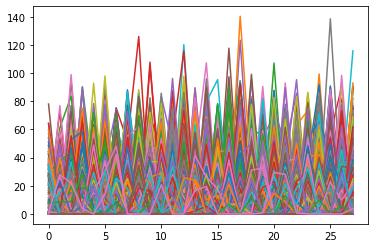

In [14]:
# background analysis

time_index_start = 5
# because 0-4th columns show irrelevant values
#t1-> 5th column
#t29-> 33th column
#(Lisa) t1~t29: background
# T31:39 = Excitatory
# T41-T48 = Refractory
# Most activity happens in the excitatory period. 
# So the transitional period is from 29 -31 seconds.
# There is not “dark” period, the whole time the fish are in the dark.
        
num_time_points = 28

fig, ax = plt.subplots()

#print (epr_filtered_data.iloc[0:5, time_index_start:time_index_start + num_time_points].values)
# first ':' shows rows, second ':' shows columns

ax.plot(np.transpose(epr_filtered_data.iloc[:,time_index_start:time_index_start + num_time_points].values));

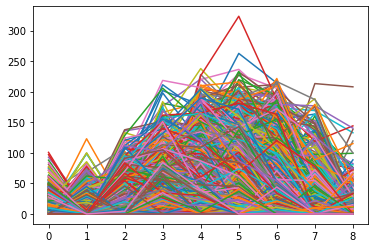

In [15]:
# Excitatory analysis

time_index_start = 34
# because 0-4th columns show irrelevant values
#t1-> 5th column
#t30-> 34th column
#(Lisa) t1~t29: background
# T31:39 = Excitatory
# T41-T48 = Refractory
# Most activity happens in the excitatory period. 
# So the transitional period is from 29 -31 seconds.
# There is not “dark” period, the whole time the fish are in the dark.
        
num_time_points = 9

fig, ax = plt.subplots()

#print (epr_filtered_data.iloc[0:5, time_index_start:time_index_start + num_time_points].values)
# first ':' shows rows, second ':' shows columns

ax.plot(np.transpose(epr_filtered_data.iloc[:,time_index_start:time_index_start + num_time_points].values));

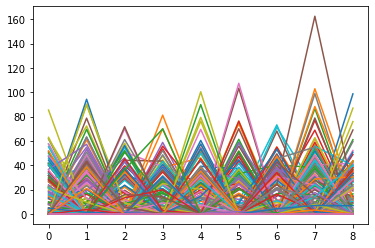

In [16]:
# Refractory analysis

time_index_start = 44
# because 0-4th columns show irrelevant values
#t1-> 5th column
#t40-> 44th column
#(Lisa) t1~t29: background
# T31:39 = Excitatory
# T41-T48 = Refractory
# Most activity happens in the excitatory period. 
# So the transitional period is from 29 -31 seconds.
# There is not “dark” period, the whole time the fish are in the dark.
        
num_time_points = 9

fig, ax = plt.subplots()

#print (epr_filtered_data.iloc[0:5, time_index_start:time_index_start + num_time_points].values)
# first ':' shows rows, second ':' shows columns

ax.plot(np.transpose(epr_filtered_data.iloc[:,time_index_start:time_index_start + num_time_points].values));

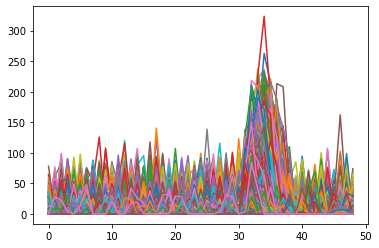

In [17]:
# whole analysis

time_index_start = 5
# because 0-4th columns show irrelevant values
#t1-> 5th column
#t29-> 33th column
#(Lisa) t1~t29: background
# T31:39 = Excitatory
# T41-T48 = Refractory
# Most activity happens in the excitatory period. 
# So the transitional period is from 29 -31 seconds.
# There is not “dark” period, the whole time the fish are in the dark.
        
num_time_points = 49 # T1 ~ T50

fig, ax = plt.subplots()

#print (epr_filtered_data.iloc[0:5, time_index_start:time_index_start + num_time_points].values)
# first ':' shows rows, second ':' shows columns

ax.plot(np.transpose(epr_filtered_data.iloc[:,time_index_start:time_index_start + num_time_points].values));

,chemical.id,plate.id,well,chemical_plate_well,conc,t1,t2,t3,t4,t5,...,t42,t43,t44,t45,t46,t47,t48,t49,t50,Chemical_Plate_WELL
1,3756,20544,A02,3756_20544_A02,100.0,0.0,0.000000,31.445283,0.000000,33.593737,...,0.000000,19.422747,5.295147,0.0,0.0,0.0,0.000000,0.0,9.765619,3756_20544_A02
3,3756,20544,A04,3756_20544_A04,100.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,3756_20544_A04
4,3756,20544,A05,3756_20544_A05,100.0,0.0,0.000000,0.000000,90.364532,23.893231,...,28.103313,5.013020,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,3756_20544_A05
5,3756,20544,A06,3756_20544_A06,100.0,0.0,48.546000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,3756_20544_A06
7,3756,20544,A08,3756_20544_A08,100.0,0.0,30.642341,0.000000,19.270834,15.017369,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,13.346362,0.0,0.000000,3756_20544_A08


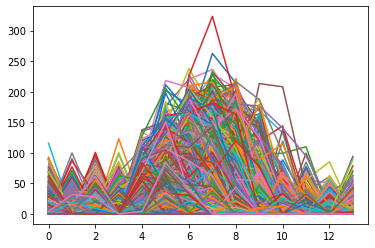

In [18]:
# transition analysis

#t28-t42
time_index_start = 32
# because 0-4th columns show irrelevant values
#t1-> 5th column
#t28-> 32th column
#(Lisa) t1~t29: background
# T31:39 = Excitatory
# T41-T48 = Refractory
# Most activity happens in the excitatory period. 
# So the transitional period is from 29 -31 seconds.
# There is not “dark” period, the whole time the fish are in the dark.
        
num_time_points = 14

fig, ax = plt.subplots()

#print (epr_filtered_data.iloc[0:5, time_index_start:time_index_start + num_time_points].values)
# first ':' shows rows, second ':' shows columns

ax.plot(np.transpose(epr_filtered_data.iloc[:,time_index_start:time_index_start + num_time_points].values));
display(epr_filtered_data.head())

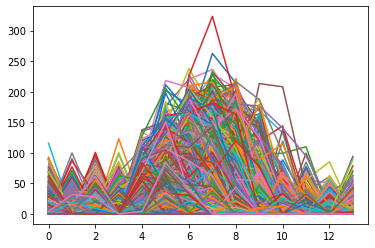

In [19]:
# transition analysis per chemical

#t28-t42
time_index_start = 32
# because 0-4th columns show irrelevant values
#t1-> 5th column
#t28-> 32th column
#(Lisa) t1~t29: background
# T31:39 = Excitatory
# T41-T48 = Refractory
# Most activity happens in the excitatory period. 
# So the transitional period is from 29 -31 seconds.
# There is not “dark” period, the whole time the fish are in the dark.
        
num_time_points = 14

fig, ax = plt.subplots()

#print (epr_filtered_data.iloc[0:5, time_index_start:time_index_start + num_time_points].values)
# first ':' shows rows, second ':' shows columns

ax.plot(np.transpose(epr_filtered_data.iloc[:,time_index_start:time_index_start + num_time_points].values));

#chemical_id_from_here = np.unique(epr_filtered_data['chemical.id'])

#for chemical_id in chemical_id_from_here:
#    print("chemical_id:" + str(chemical_id))
#    epr_filtered_data_per_chemical_id = epr_filtered_data.loc[epr_filtered_data['chemical.id'] == chemical_id]
#    ax.plot(np.transpose(epr_filtered_data_per_chemical_id.iloc[:,time_index_start:time_index_start + num_time_points].values));

#epr_filtered_data_per_chemical_id = epr_filtered_data.loc[epr_filtered_data['chemical.id'] == 3756]
#ax.plot(np.transpose(epr_filtered_data_per_chemical_id.iloc[:,time_index_start:time_index_start + num_time_points].values));

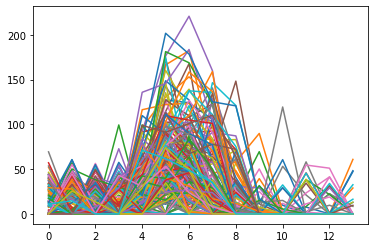

In [20]:
fig, ax = plt.subplots()
epr_filtered_data_per_chemical_id = epr_filtered_data.loc[epr_filtered_data['chemical.id'] == 3756]
ax.plot(np.transpose(epr_filtered_data_per_chemical_id.iloc[:,time_index_start:time_index_start + num_time_points].values));

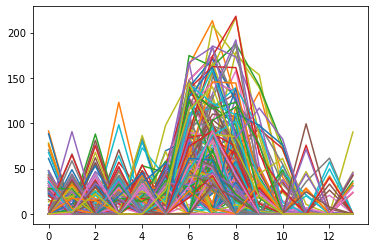

In [21]:
fig, ax = plt.subplots()
epr_filtered_data_per_chemical_id = epr_filtered_data.loc[epr_filtered_data['chemical.id'] == 3758]
ax.plot(np.transpose(epr_filtered_data_per_chemical_id.iloc[:,time_index_start:time_index_start + num_time_points].values));

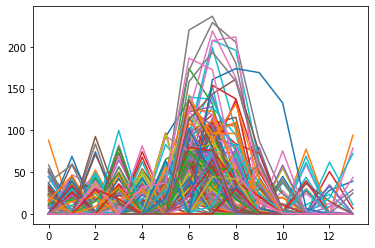

In [22]:
fig, ax = plt.subplots()
epr_filtered_data_per_chemical_id = epr_filtered_data.loc[epr_filtered_data['chemical.id'] == 3759]
ax.plot(np.transpose(epr_filtered_data_per_chemical_id.iloc[:,time_index_start:time_index_start + num_time_points].values));

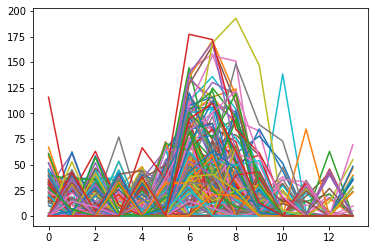

In [23]:
fig, ax = plt.subplots()
epr_filtered_data_per_chemical_id = epr_filtered_data.loc[epr_filtered_data['chemical.id'] == 3760]
ax.plot(np.transpose(epr_filtered_data_per_chemical_id.iloc[:,time_index_start:time_index_start + num_time_points].values));

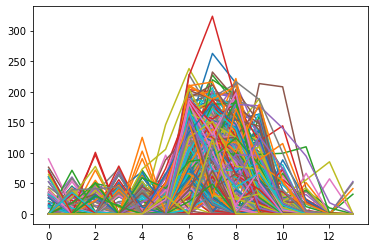

In [24]:
fig, ax = plt.subplots()
epr_filtered_data_per_chemical_id = epr_filtered_data.loc[epr_filtered_data['chemical.id'] == 3761]
ax.plot(np.transpose(epr_filtered_data_per_chemical_id.iloc[:,time_index_start:time_index_start + num_time_points].values));

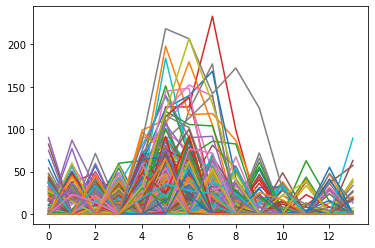

In [25]:
fig, ax = plt.subplots()
epr_filtered_data_per_chemical_id = epr_filtered_data.loc[epr_filtered_data['chemical.id'] == 3762]
ax.plot(np.transpose(epr_filtered_data_per_chemical_id.iloc[:,time_index_start:time_index_start + num_time_points].values));

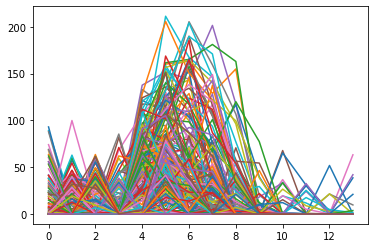

In [26]:
fig, ax = plt.subplots()
epr_filtered_data_per_chemical_id = epr_filtered_data.loc[epr_filtered_data['chemical.id'] == 3859]
ax.plot(np.transpose(epr_filtered_data_per_chemical_id.iloc[:,time_index_start:time_index_start + num_time_points].values));

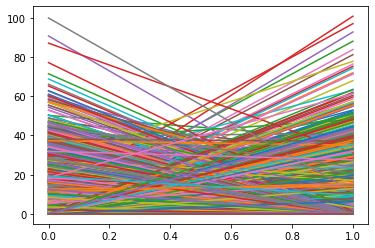

In [27]:
# transition analysis
# Plot few epr curves to check transition points
# Plotting to make sure that data makes sense

time_index_start = 33
# because 0-4th columns show irrelevant values
#t1-> 5th column
#t29-> 33th column
#(Lisa) t1~t29: background
# T31:39 = Excitatory
# T41-T48 = Refractory
# Most activity happens in the excitatory period. 
# So the transitional period is from 29 -31 seconds.
# There is not “dark” period, the whole time the fish are in the dark.
        
#num_time_points = 21 # T29 ~ T50
num_time_points = 2 # T29 ~ 31

fig, ax = plt.subplots()

#print (epr_filtered_data.iloc[0:5, time_index_start:time_index_start + num_time_points].values)
# first ':' shows rows, second ':' shows columns

ax.plot(np.transpose(epr_filtered_data.iloc[:,time_index_start:time_index_start + num_time_points].values));

In [28]:
#“So the transitional period is from 29 -31 seconds.”

delta_mov_auc = epr_filtered_data[['chemical.id', 'conc', 'plate.id', 'well']].copy()
transition_points = [29]

num_before_transition = 7 # seems reasonable based on above pictures
num_after_transition  = 7

for transition_index, transition_point in enumerate(transition_points):
    print ("\ntransition_index:"+str(transition_index))
    print ("transition_point:" + str(transition_point))
    
    delta_mov_auc['MOV' + str(transition_index + 1)] \
    = epr_filtered_data['t' + str(transition_point + 1)] \
    - epr_filtered_data['t' + str(transition_point)]
    
    delta_mov_auc['AUC' + str(transition_index + 1)] \
    = sum(epr_filtered_data['t' + str(transition_point + 1 + index_count)] \
          for index_count in range(num_after_transition)) - \
      sum(epr_filtered_data['t' + str(transition_point - index_count)] \
          for index_count in range(num_before_transition))


transition_index:0
transition_point:29


In [29]:
unique_chemical_id_in_epr_filtered_data = np.unique(epr_filtered_data['chemical.id'])
print (len(unique_chemical_id_in_epr_filtered_data))

7


In [30]:
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace = True)
display(delta_mov_auc.head())
unique_chemical_id_in_delta_mov_auc = np.unique(delta_mov_auc['Chemical.ID'])
print (len(unique_chemical_id_in_delta_mov_auc))

,Chemical.ID,CONC,Plate,WELL,MOV1,AUC1
1,3756,100.0,20544,A02,30.859375,24.804644
3,3756,100.0,20544,A04,-7.573786,-79.210026
4,3756,100.0,20544,A05,-6.662347,32.269962
5,3756,100.0,20544,A06,0.000000,-4.144946
7,3756,100.0,20544,A08,0.000000,37.977418


7


In [31]:
display(delta_mov_auc.tail())

,Chemical.ID,CONC,Plate,WELL,MOV1,AUC1
2009,3859,100.0,20491,H06,49.327263,103.884511
2012,3859,100.0,20491,H09,0.000000,0.021701
2013,3859,100.0,20491,H10,43.576390,-28.407165
2014,3859,100.0,20491,H11,0.000000,0.000000
2015,3859,100.0,20491,H12,-4.318556,119.379385


In [32]:
import generate_dose_response_newest_no_avg as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [33]:
start_time = time.time()
os.chdir(starting_dir)

if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

#report = True
report = False

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(delta_mov_auc['Chemical.ID'])
    end_points = ['MOV1','AUC1']
else:
    chemical_id_from_here = [3756]
    end_points = ['MOV1']
    
for chemical_id in chemical_id_from_here:
    print("chemical_id:" + str(chemical_id))
    for end_point in end_points:
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        if (report): 
            print("end_point:" + str(end_point))
            print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))
            print("type(delta_mov_auc_end_point_chemical_id):\n"+str(type(delta_mov_auc_end_point_chemical_id)))
            print("type(end_point):\n"+str(type(end_point)))

        dose_response = gdr.gen_dose_response_behavior(delta_mov_auc_end_point_chemical_id, end_point)
        if (report): 
            print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) 
# for 1 chemical (3756) and 2 endpoints (['MOV1','AUC1']), 140 seconds took
# for   all 7 chemicals and 2 endpoints (['MOV1','AUC1']), 440 seconds took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()

chemical_id:3756
end_point:MOV1
delta_mov_auc_end_point_chemical_id:
     Chemical.ID   CONC  Plate WELL       MOV1
1           3756  100.0  20544  A02  30.859375
3           3756  100.0  20544  A04  -7.573786
4           3756  100.0  20544  A05  -6.662347
5           3756  100.0  20544  A06   0.000000
7           3756  100.0  20544  A08   0.000000
..           ...    ...    ...  ...        ...
283         3756    0.0  20625  H08  42.469594
284         3756    0.0  20625  H09 -44.835059
285         3756    0.0  20625  H10  -0.889757
286         3756    0.0  20625  H11 -11.979200
287         3756    0.0  20625  H12 -14.670154

[240 rows x 5 columns]
type(delta_mov_auc_end_point_chemical_id):
<class 'pandas.core.frame.DataFrame'>
type(end_point):
<class 'str'>
dose_response:
     dose  num_affect  num_embryos
0    0.00         3.0         20.0
1    2.16        22.0         23.0
2    6.80        21.0         23.0
3   14.70        20.0         21.0
4   31.60        19.0         19.0
5   56

In [34]:
np.exp((np.log(0.1/(1-0.1)) - 0.00088637)/0.03373856)

5.071672098544112e-29